<font size=5>Final Project:COVID-19 analysis</font>  
Shunfang Wang&Zhikang Qin

In this case,the dataset we are using is downloaded from the European Centre for Disease Prevention and Control(https://www.ecdc.europa.eu/en).  
First of all,we load the data and preprocess it.

## Table of Contents

1. [Introduce the dataset](#section1)
2. [New variable creation.](#section2)
3. [draw the geometric map](#section3)
4. [Regression models.](#section4)
5. [clustering method](#section5)
6. [MDS technique](#section6)

<a id='section1'></a>
## 1.Introduce the dataset

**'(Sect. 2) in paper'**

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = '../data'
url = '%s/data.csv' % path
cov19 = pd.read_csv(url)
cov19

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0      14/12/2020   14     12  2020    746       6             Afghanistan   
1      13/12/2020   13     12  2020    298       9             Afghanistan   
2      12/12/2020   12     12  2020    113      11             Afghanistan   
3      11/12/2020   11     12  2020     63      10             Afghanistan   
4      10/12/2020   10     12  2020    202      16             Afghanistan   
...           ...  ...    ...   ...    ...     ...                     ...   
61895  25/03/2020   25      3  2020      0       0                Zimbabwe   
61896  24/03/2020   24      3  2020      0       1                Zimbabwe   
61897  23/03/2020   23      3  2020      0       0                Zimbabwe   
61898  22/03/2020   22      3  2020      1       0                Zimbabwe   
61899  21/03/2020   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  \
0        AF                  AFG   38041757.0         Asia   
1        AF                  AFG   38041757.0         Asia   
2        AF                  AFG   38041757.0         Asia   
3        AF                  AFG   38041757.0         Asia   
4        AF                  AFG   38041757.0         Asia   
...     ...                  ...          ...          ...   
61895    ZW                  ZWE   14645473.0       Africa   
61896    ZW                  ZWE   14645473.0       Africa   
61897    ZW                  ZWE   14645473.0       Africa   
61898    ZW                  ZWE   14645473.0       Africa   
61899    ZW                  ZWE   14645473.0       Africa   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                               9.013779           
1                                               7.052776           
2                                               6.868768           
3                                               7.134266           
4                                               6.968658           
...                                                  ...           
61895                                                NaN           
61896                                                NaN           
61897                                                NaN           
61898                                                NaN           
61899                                                NaN           

[61900 rows x 12 columns]

<a id='section2'></a>
## 2.New variable creation

Translate **'dateRep'** into datetime format
 
 **"panda.to_datetime"**: Converts the given data to date format in a specified format.
 
Cause in the paper, it requires to compute the the days which is the number of days since 12/4/2020 

In [3]:
cov19['dateRep']=pd.to_datetime(cov19['dateRep'],format = '%d/%m/%Y')
cov19=cov19.query('dateRep<datetime.datetime(2020, 4, 13)')
cov19.head()

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
246 2020-04-12   12      4  2020     34       3             Afghanistan    AF   
247 2020-04-11   11      4  2020     37       0             Afghanistan    AF   
248 2020-04-10   10      4  2020     61       1             Afghanistan    AF   
249 2020-04-09    9      4  2020     56       3             Afghanistan    AF   
250 2020-04-08    8      4  2020     30       4             Afghanistan    AF   

    countryterritoryCode  popData2019 continentExp  \
246                  AFG   38041757.0         Asia   
247                  AFG   38041757.0         Asia   
248                  AFG   38041757.0         Asia   
249                  AFG   38041757.0         Asia   
250                  AFG   38041757.0         Asia   

     Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
246                                           1.180282           
247                                           1.130337           
248                                           1.075134           
249                                           0.914784           
250                                           0.854324



In the next step, we sort value firstly by countries and then the exact date using ascending.



In [4]:
cov19.sort_values(by=['countriesAndTerritories','dateRep'],ascending=True,inplace=True)
cov19.head()

<ipython-input-4-ae969d9d931e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov19.sort_values(by=['countriesAndTerritories','dateRep'],ascending=True,inplace=True)


dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
339 2019-12-31   31     12  2019      0       0             Afghanistan    AF   
338 2020-01-01    1      1  2020      0       0             Afghanistan    AF   
337 2020-01-02    2      1  2020      0       0             Afghanistan    AF   
336 2020-01-03    3      1  2020      0       0             Afghanistan    AF   
335 2020-01-04    4      1  2020      0       0             Afghanistan    AF   

    countryterritoryCode  popData2019 continentExp  \
339                  AFG   38041757.0         Asia   
338                  AFG   38041757.0         Asia   
337                  AFG   38041757.0         Asia   
336                  AFG   38041757.0         Asia   
335                  AFG   38041757.0         Asia   

     Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
339                                                NaN           
338                                                NaN           
337                                                NaN           
336                                                NaN           
335                                                NaN

In the next cell, I would like to see which county have the cases in 2019.

In [5]:
cov2019=cov19.query('cases!=0 & year==2019')
cov2019.head()

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
12447 2019-12-31   31     12  2019     27       0                   China   

      geoId countryterritoryCode   popData2019 continentExp  \
12447    CN                  CHN  1.433784e+09         Asia   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
12447                                                NaN

**Comments**: The first recoring case is start on 31/12/2019 for each country. But in this dataset, we can clearly see that only China have           the cases wihch is equal to 27

Creat new variable **'cumulative_cases'**

Here we generate the `new variable` named `cumulative_cases`. In this variable, we could get the cumulative number of cases for each days

In [6]:
data_2 = cov19.groupby(['countriesAndTerritories'])
cov19['cumulative_cases'] = data_2['cases'].cumsum()
cov19

<ipython-input-6-864aaae3bf39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov19['cumulative_cases'] = data_2['cases'].cumsum()


dateRep  day  month  year  cases  deaths countriesAndTerritories  \
339   2019-12-31   31     12  2019      0       0             Afghanistan   
338   2020-01-01    1      1  2020      0       0             Afghanistan   
337   2020-01-02    2      1  2020      0       0             Afghanistan   
336   2020-01-03    3      1  2020      0       0             Afghanistan   
335   2020-01-04    4      1  2020      0       0             Afghanistan   
...          ...  ...    ...   ...    ...     ...                     ...   
61881 2020-04-08    8      4  2020      1       0                Zimbabwe   
61880 2020-04-09    9      4  2020      1       1                Zimbabwe   
61879 2020-04-10   10      4  2020      0       1                Zimbabwe   
61878 2020-04-11   11      4  2020      0       0                Zimbabwe   
61877 2020-04-12   12      4  2020      3       0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  \
339      AF                  AFG   38041757.0         Asia   
338      AF                  AFG   38041757.0         Asia   
337      AF                  AFG   38041757.0         Asia   
336      AF                  AFG   38041757.0         Asia   
335      AF                  AFG   38041757.0         Asia   
...     ...                  ...          ...          ...   
61881    ZW                  ZWE   14645473.0       Africa   
61880    ZW                  ZWE   14645473.0       Africa   
61879    ZW                  ZWE   14645473.0       Africa   
61878    ZW                  ZWE   14645473.0       Africa   
61877    ZW                  ZWE   14645473.0       Africa   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
339                                                  NaN            
338                                                  NaN            
337                                                  NaN            
336                                                  NaN            
335                                                  NaN            
...                                                  ...            
61881                                           0.054624            
61880                                           0.054624            
61879                                           0.054624            
61878                                           0.040968            
61877                                           0.047796            

       cumulative_cases  
339                   0  
338                   0  
337                   0  
336                   0  
335                   0  
...                 ...  
61881                10  
61880                11  
61879                11  
61878                11  
61877                14  

[10370 rows x 13 columns]

<a id='section3'></a>
## 3. draw the geometric map

Present the date of first case for each country

**'copy'**: If it does not contain a mutable object, Changing the copy object will also change the original data. 
         If it include mutable objects,  Changing the copy object will not change the original data. 
**"as_index=False"**: We set countries not as the index (in the index position)

In [7]:
cov19_day=cov19.copy
cov19_day=cov19.query('cases>0')

In [8]:
cov19_day = cov19_day.groupby(["countriesAndTerritories"],as_index=False)[["dateRep",'countryterritoryCode','geoId']].agg("min")
cov19_day.head()

countriesAndTerritories    dateRep countryterritoryCode geoId
0             Afghanistan 2020-02-25                  AFG    AF
1                 Albania 2020-03-09                  ALB    AL
2                 Algeria 2020-02-26                  DZA    DZ
3                 Andorra 2020-03-03                  AND    AD
4                  Angola 2020-03-22                  AGO    AO

Obtain variable **'days'** which represents cumulative days since first case happened in each country.

**"apply"**: the function automatically traverses each row of DataFrame data, combining all the results into a Series data structure and returning them.


In [9]:
import datetime
cov19_day['days']=datetime.datetime(2020, 4, 12)
cov19_day['days']=(cov19_day['days']-cov19_day['dateRep']).apply(lambda x : x.days)
cov19_day.head()

countriesAndTerritories    dateRep countryterritoryCode geoId  days
0             Afghanistan 2020-02-25                  AFG    AF    47
1                 Albania 2020-03-09                  ALB    AL    34
2                 Algeria 2020-02-26                  DZA    DZ    46
3                 Andorra 2020-03-03                  AND    AD    40
4                  Angola 2020-03-22                  AGO    AO    21

Now we can plot 'days since first case'. This is the geographic map of the COVID-19 spread for 165 countries. The color map is proportional to the number of days elapsed since the occurrence of the first case for each country for the period of time τ

In [10]:
import plotly.express as px
fig = px.choropleth(cov19_day, locations="countryterritoryCode",
                    color="days",
                    hover_name="countriesAndTerritories" ,
                    color_continuous_scale='reds'
                    )

In [11]:
fig.update_layout(
    title_text = 'days since first case',
    geo = dict(projection={'type':'natural earth'}) 
)
fig.show()

In this map, the colormap is proportional to the number of days elapesed since the occurance of the first cases in each country.Covid-19 is particularly serve in the northern hemisphere


Then we consider to plot the histogram of **log r** in China.  
The first step is to filter dataset by country and  calculate the value of log r.


**"Analysis only about China"**

**'china_cases.reset_index(drop=True)'** : In this code, I delete the original index in order to be more readable

In [12]:
china_cases=cov19.query('countriesAndTerritories=="China"')[['countriesAndTerritories','dateRep','cases','cumulative_cases']]
china_cases['rate']=0 
china_cases=china_cases.reset_index(drop=True)
china_cases

countriesAndTerritories    dateRep  cases  cumulative_cases  rate
0                     China 2019-12-31     27                27     0
1                     China 2020-01-01      0                27     0
2                     China 2020-01-02      0                27     0
3                     China 2020-01-03     17                44     0
4                     China 2020-01-04      0                44     0
..                      ...        ...    ...               ...   ...
99                    China 2020-04-08     86             82784     0
100                   China 2020-04-09     86             82870     0
101                   China 2020-04-10     55             82925     0
102                   China 2020-04-11     79             83004     0
103                   China 2020-04-12     93             83097     0

[104 rows x 5 columns]

 For characterizing the evolution of daily infections per country, The log function below is the function which is written in the paper. We calculate the log return:
r(t) = ln [$\frac{x(t)}{x(t − 1)}$]   , t = 2,..., T. This is written in P 2956 in the paper

In [13]:
import math
for i in range(1,len(china_cases)):
     if china_cases.loc[i,'cases']!=0 and china_cases.loc[i-1,'cases']!=0 :
        china_cases.loc[i,'rate']=math.log(china_cases.loc[i,'cases']/china_cases.loc[i-1,'cases'])
china_cases

countriesAndTerritories    dateRep  cases  cumulative_cases      rate
0                     China 2019-12-31     27                27  0.000000
1                     China 2020-01-01      0                27  0.000000
2                     China 2020-01-02      0                27  0.000000
3                     China 2020-01-03     17                44  0.000000
4                     China 2020-01-04      0                44  0.000000
..                      ...        ...    ...               ...       ...
99                    China 2020-04-08     86             82784  0.428996
100                   China 2020-04-09     86             82870  0.000000
101                   China 2020-04-10     55             82925 -0.447014
102                   China 2020-04-11     79             83004  0.362115
103                   China 2020-04-12     93             83097  0.163152

[104 rows x 5 columns]

**'Comment'**: In this table, we could see that on 10/4/2020. The value of the rate is negative which means the number of cases is lower than the cases having on 9/4/2020.

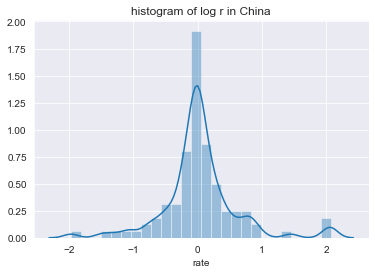

In [14]:
import seaborn as sns
sns.set_style('darkgrid')
hist=sns.distplot(china_cases['rate'])
hist.set_title('histogram of log r in China')
hist_fig=hist.get_figure()
hist_fig.savefig('../results/hist')

**'Comment'**: The distribution here is almost Gaussian.

<a id='section4'></a>
## 4. Regression models 

**'(Sect. 3)'**

Logistic model is a commonly used population prediction model. On the basis of Logistic model, another parameter is added to obtain a nonlinear S-type growth model with four parameters, namely Richards model

Our next task is to plot the time series of cumulative number of cases in China and use ‘Logistic’model to fit it.
y(t) = [$\frac{a}{1 + be−ct }$],

In [15]:
china_cases['time']=(china_cases['dateRep']-min(china_cases['dateRep'])).apply(lambda x : x.days)
china_cases

countriesAndTerritories    dateRep  cases  cumulative_cases      rate  \
0                     China 2019-12-31     27                27  0.000000   
1                     China 2020-01-01      0                27  0.000000   
2                     China 2020-01-02      0                27  0.000000   
3                     China 2020-01-03     17                44  0.000000   
4                     China 2020-01-04      0                44  0.000000   
..                      ...        ...    ...               ...       ...   
99                    China 2020-04-08     86             82784  0.428996   
100                   China 2020-04-09     86             82870  0.000000   
101                   China 2020-04-10     55             82925 -0.447014   
102                   China 2020-04-11     79             83004  0.362115   
103                   China 2020-04-12     93             83097  0.163152   

     time  
0       0  
1       1  
2       2  
3       3  
4       4  
..    ...  
99     99  
100   100  
101   101  
102   102  
103   103  

[104 rows x 6 columns]

Here we creat the function to fit the time series with different model

In [16]:
def tsfit(x,y,func,c0):
    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit
    p_est,err_est=curve_fit(func,x,y,c0)
    plt.style.use('ggplot') 
    plot1=plt.plot(x,y,'x',label="real_data")
    plot2=plt.plot(x,func(x,*p_est), "-",label="fitting_model") 

At first, I set the initial value of parameters. The I define the logistic function to get the return

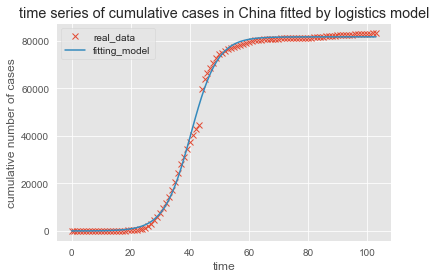

In [17]:
c0=np.array([5*(10**4),10**4,0.2])
def logistics(x,a,b,c):
    result=a/(1+b*np.exp(-c*x))
    return result
import matplotlib.pyplot as plt
tsfit(china_cases['time'],china_cases['cumulative_cases'],logistics,c0)
plt.title('time series of cumulative cases in China fitted by logistics model')
plt.legend(loc=0) 
plt.xlabel("time");plt.ylabel("cumulative number of cases") 
plt.savefig('../results/ts_China.jpg')

Then we can  plot the time series of cumulative number of cases in Italy and use ‘Richards’ model to fit it.

In [18]:
italy_cases=cov19.query('countriesAndTerritories=="Italy"')[['countriesAndTerritories','dateRep','cases','cumulative_cases']]
italy_cases.head(5)

countriesAndTerritories    dateRep  cases  cumulative_cases
29448                   Italy 2019-12-31      0                 0
29447                   Italy 2020-01-01      0                 0
29446                   Italy 2020-01-02      0                 0
29445                   Italy 2020-01-03      0                 0
29444                   Italy 2020-01-04      0                 0

As we generate the time variable in China which indicate the number of days in Italy. The first day sets to 0 and then the second day is 1, etc

In [19]:
italy_cases['time']=(italy_cases['dateRep']-min(italy_cases['dateRep'])).apply(lambda x : x.days)
italy_cases

countriesAndTerritories    dateRep  cases  cumulative_cases  time
29448                   Italy 2019-12-31      0                 0     0
29447                   Italy 2020-01-01      0                 0     1
29446                   Italy 2020-01-02      0                 0     2
29445                   Italy 2020-01-03      0                 0     3
29444                   Italy 2020-01-04      0                 0     4
...                       ...        ...    ...               ...   ...
29349                   Italy 2020-04-08   3039            135586    99
29348                   Italy 2020-04-09   3836            139422   100
29347                   Italy 2020-04-10   4204            143626   101
29346                   Italy 2020-04-11   3951            147577   102
29345                   Italy 2020-04-12   4694            152271   103

[104 rows x 5 columns]

In next code, we define the function of rechards model.

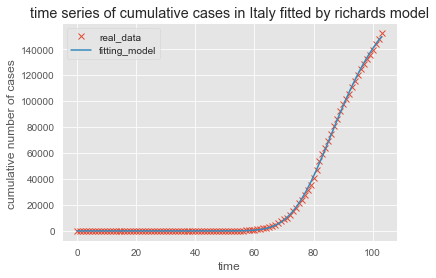

In [20]:
def richards(x,a,b,c,d):
    result=a/((1+np.exp(b-c*x))**(1/d))
    return result
c0=np.array([10**5,5,0.1,0.2])#initial value of parameters

tsfit(italy_cases['time'],italy_cases['cumulative_cases'],richards,c0)
plt.title('time series of cumulative cases in Italy fitted by richards model')
plt.legend(loc=0) 
plt.xlabel("time");plt.ylabel("cumulative number of cases ") 
plt.savefig('../results/ts_Italy.jpg')

**'comment'**:The richard model fits better to the Italy data than logistic fits to China.

<a id='section5'></a>
## 5. clustering method

Now we use agglomerative clustering method to analyze the dataset.

**'pivot_table'**: This is a table format that dynamically arranges and aggregates data. It has the characteristics of high flexibility and strong operability.

In [21]:
dataset=pd.pivot_table(cov19,index='countriesAndTerritories',values='cumulative_cases',columns='dateRep')
dataset.head()

dateRep                  2019-12-31  2020-01-01  2020-01-02  2020-01-03  \
countriesAndTerritories                                                   
Afghanistan                     0.0         0.0         0.0         0.0   
Albania                         NaN         NaN         NaN         NaN   
Algeria                         0.0         0.0         0.0         0.0   
Andorra                         NaN         NaN         NaN         NaN   
Angola                          NaN         NaN         NaN         NaN   

dateRep                  2020-01-04  2020-01-05  2020-01-06  2020-01-07  \
countriesAndTerritories                                                   
Afghanistan                     0.0         0.0         0.0         0.0   
Albania                         NaN         NaN         NaN         NaN   
Algeria                         0.0         0.0         0.0         0.0   
Andorra                         NaN         NaN         NaN         NaN   
Angola                          NaN         NaN         NaN         NaN   

dateRep                  2020-01-08  2020-01-09  ...  2020-04-03  2020-04-04  \
countriesAndTerritories                          ...                           
Afghanistan                     0.0         0.0  ...       235.0       235.0   
Albania                         NaN         NaN  ...       277.0       304.0   
Algeria                         0.0         0.0  ...       986.0      1171.0   
Andorra                         NaN         NaN  ...       428.0       439.0   
Angola                          NaN         NaN  ...         8.0         8.0   

dateRep                  2020-04-05  2020-04-06  2020-04-07  2020-04-08  \
countriesAndTerritories                                                   
Afghanistan                   270.0       299.0       337.0       367.0   
Albania                       333.0       361.0       377.0       383.0   
Algeria                      1251.0      1320.0      1423.0      1468.0   
Andorra                       466.0       501.0       526.0       545.0   
Angola                         10.0        14.0        16.0        17.0   

dateRep                  2020-04-09  2020-04-10  2020-04-11  2020-04-12  
countriesAndTerritories                                                  
Afghanistan                   423.0       484.0       521.0       555.0  
Albania                       400.0       409.0       416.0       433.0  
Algeria                      1572.0      1666.0      1761.0      1825.0  
Andorra                       564.0       583.0       601.0       622.0  
Angola                         19.0        19.0        19.0        19.0  

[5 rows x 104 columns]

In [22]:
dataset['country']=dataset.index.values
dataset= pd.merge(dataset, cov19_day, left_on='country', right_on='countriesAndTerritories', how='inner')
dataset=dataset.drop(['countriesAndTerritories', 'countryterritoryCode','dateRep'], axis=1)
dataset.head()

2019-12-31 00:00:00  2020-01-01 00:00:00  2020-01-02 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  NaN                  NaN                  NaN   
2                  0.0                  0.0                  0.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-01-03 00:00:00  2020-01-04 00:00:00  2020-01-05 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  NaN                  NaN                  NaN   
2                  0.0                  0.0                  0.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-01-06 00:00:00  2020-01-07 00:00:00  2020-01-08 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  NaN                  NaN                  NaN   
2                  0.0                  0.0                  0.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-01-09 00:00:00  ...  2020-04-06 00:00:00  2020-04-07 00:00:00  \
0                  0.0  ...                299.0                337.0   
1                  NaN  ...                361.0                377.0   
2                  0.0  ...               1320.0               1423.0   
3                  NaN  ...                501.0                526.0   
4                  NaN  ...                 14.0                 16.0   

   2020-04-08 00:00:00  2020-04-09 00:00:00  2020-04-10 00:00:00  \
0                367.0                423.0                484.0   
1                383.0                400.0                409.0   
2               1468.0               1572.0               1666.0   
3                545.0                564.0                583.0   
4                 17.0                 19.0                 19.0   

   2020-04-11 00:00:00  2020-04-12 00:00:00      country  geoId  days  
0                521.0                555.0  Afghanistan     AF    47  
1                416.0                433.0      Albania     AL    34  
2               1761.0               1825.0      Algeria     DZ    46  
3                601.0                622.0      Andorra     AD    40  
4                 19.0                 19.0       Angola     AO    21  

[5 rows x 107 columns]

Here we filter countries that we want to analyze.

Here is the subset of the countryterritoryCode. These countryterritory codes are selected from the paper. There are 79 codes

In [23]:
alist = ['AL','DZ','AR','AM','AU','AT','BH','BE','BR','BN','BG','CA','CL','CN','CO',\
         'CR','HR','CZ','DK','EC','EG','EE','FI','FR','GE','DE','EL','HU','IS','IN','ID',\
        'IR','IQ','IE','IL','IT','JP','KW','LV','LB','LU','MY','MT','MX','MD','MA','NL','NZ','NO',\
        'OM','PK','PS','PA','PE','PH','PL','PT','QA','RO','RU','SM','SA','SN','RS','SG','SK','SI',\
        'ZA','KR','ES','SE','CH','TW','TH','TN','AE','UK','US','VN']

In [24]:
alist = '|'.join(alist)
sub_data=dataset[dataset.geoId.str.contains(alist,na=False)]
sub_data=sub_data.drop(index=[37])#it is an Abnormal observation,,so we drop it.
sub_data

2019-12-31 00:00:00  2020-01-01 00:00:00  2020-01-02 00:00:00  \
1                    NaN                  NaN                  NaN   
2                    0.0                  0.0                  0.0   
7                    NaN                  NaN                  NaN   
8                    0.0                  0.0                  0.0   
10                   0.0                  0.0                  0.0   
..                   ...                  ...                  ...   
189                  NaN                  NaN                  NaN   
194                  0.0                  0.0                  0.0   
195                  0.0                  0.0                  0.0   
198                  0.0                  0.0                  0.0   
202                  0.0                  0.0                  0.0   

     2020-01-03 00:00:00  2020-01-04 00:00:00  2020-01-05 00:00:00  \
1                    NaN                  NaN                  NaN   
2                    0.0                  0.0                  0.0   
7                    NaN                  NaN                  NaN   
8                    0.0                  0.0                  0.0   
10                   0.0                  0.0                  0.0   
..                   ...                  ...                  ...   
189                  NaN                  NaN                  NaN   
194                  0.0                  0.0                  0.0   
195                  0.0                  0.0                  0.0   
198                  0.0                  0.0                  0.0   
202                  0.0                  0.0                  0.0   

     2020-01-06 00:00:00  2020-01-07 00:00:00  2020-01-08 00:00:00  \
1                    NaN                  NaN                  NaN   
2                    0.0                  0.0                  0.0   
7                    NaN                  NaN                  NaN   
8                    0.0                  0.0                  0.0   
10                   0.0                  0.0                  0.0   
..                   ...                  ...                  ...   
189                  NaN                  NaN                  NaN   
194                  0.0                  0.0                  0.0   
195                  0.0                  0.0                  0.0   
198                  0.0                  0.0                  0.0   
202                  0.0                  0.0                  0.0   

     2020-01-09 00:00:00  ...  2020-04-06 00:00:00  2020-04-07 00:00:00  \
1                    NaN  ...                361.0                377.0   
2                    0.0  ...               1320.0               1423.0   
7                    NaN  ...               1554.0               1628.0   
8                    0.0  ...                833.0                853.0   
10                   0.0  ...               5744.0               5844.0   
..                   ...  ...                  ...                  ...   
189                  NaN  ...                553.0                574.0   
194                  0.0  ...               1783.0               2045.0   
195                  0.0  ...              57180.0              60772.0   
198                  0.0  ...             337635.0             368196.0   
202                  0.0  ...                245.0                251.0   

     2020-04-08 00:00:00  2020-04-09 00:00:00  2020-04-10 00:00:00  \
1                  383.0                400.0                409.0   
2                 1468.0               1572.0               1666.0   
7                 1715.0               1795.0               1894.0   
8                  881.0                921.0                937.0   
10                5956.0               6052.0               6152.0   
..                   ...                  ...                  ...   
189                596.0                623.0                643.0   
194               231

In [25]:
import scipy.cluster.hierarchy as sch 

Using 'canberra' method to calculate the distance between different countries.

**‘Canberra distance’**：The Canberra distance has the relevant property of being relatively insensitive to the simultaneous presence of large and small values. The other method are also tested by author. But further distances are not included herein for sake of parsimony.

In [26]:
q=sub_data.shape[1]-3
Y=sub_data.iloc[:,0:q]
disMat = sch.distance.pdist(Y,'canberra')
print(disMat.shape)

(3081,)


Then we apply the 'average'  for the linkage method, which is the mean of the distance between all the elements in the two clusters.

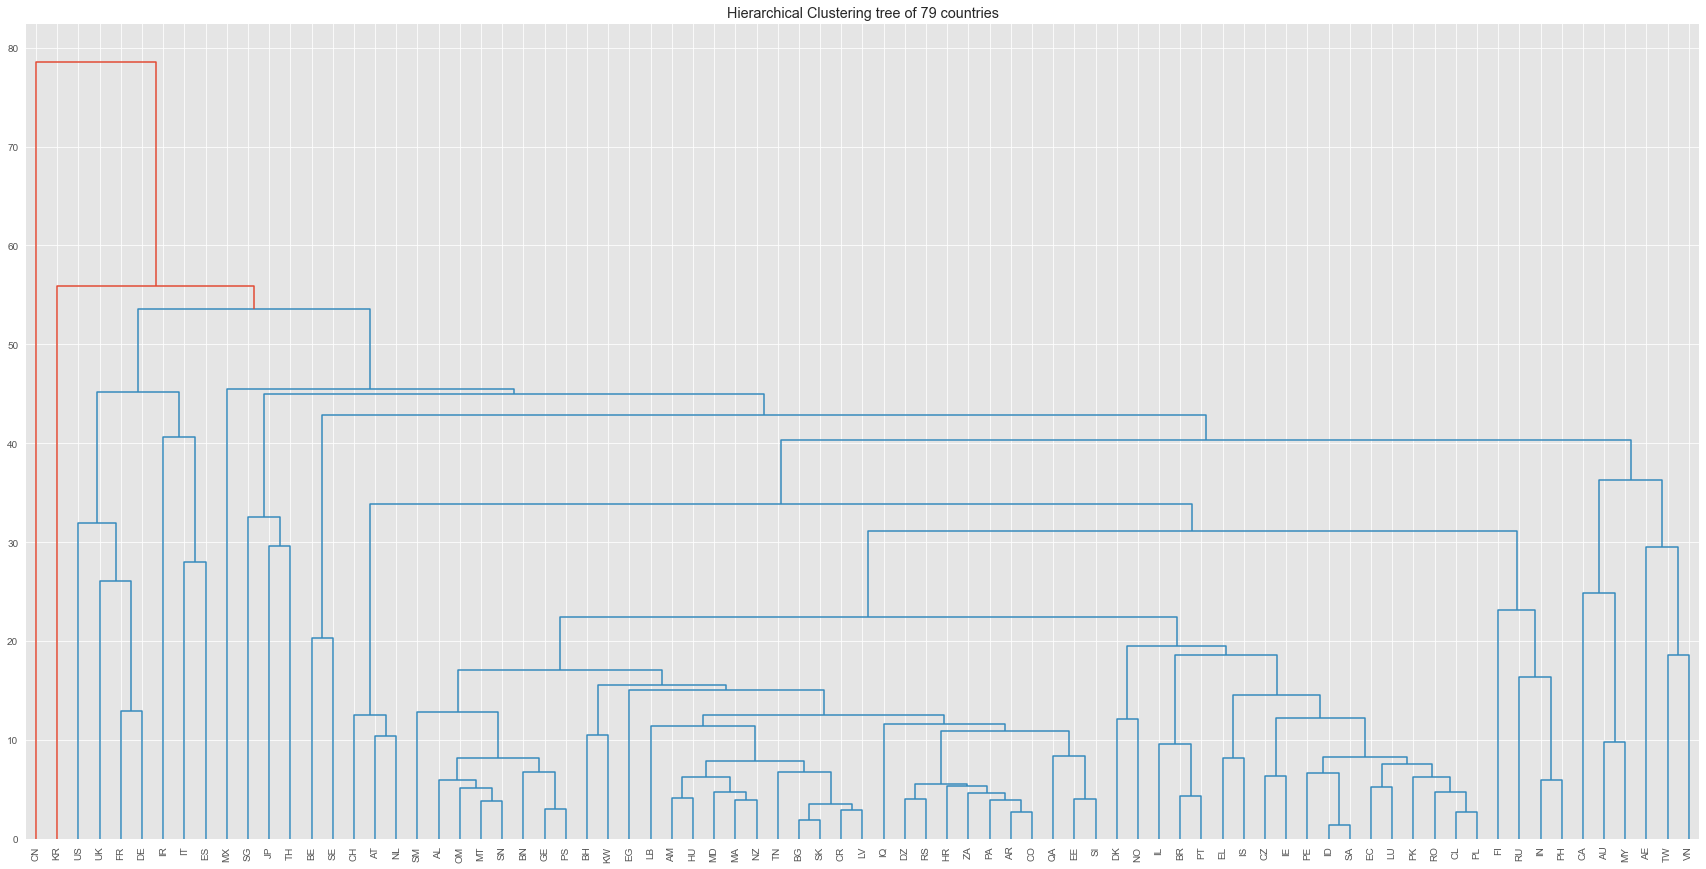

In [27]:
Z=sch.linkage(disMat,method='average') 
plt.figure(figsize=(30,15))
plt.title('Hierarchical Clustering tree of 79 countries')
sch.dendrogram(Z,labels=list(sub_data.loc[:,'geoId']),leaf_font_size=10)
plt.savefig('../results/agg.jpg')
plt.show()

If we divide it in two groups, it would be China with others. So we could know that China has more cases

<a id='section5'></a>
## 5. MDS technique

    Then we use MDS technique（A method of dimensionality reduction） to visualize the COVID-19 dataset in 3D space. There is a distinct phenomenon and applying only MDS, that datasets under the influence of social and human factors phenomena exhibit a relativistic behavior and eventually different velocities.

In [28]:
from sklearn import datasets,manifold
from scipy.spatial.distance import squareform

Then we get the distance matrics.

In [29]:
disMat=squareform(disMat)
disMat

array([[ 0.        , 12.56547319, 15.66346389, ..., 34.31114814,
        34.70389858,  6.77096043],
       [12.56547319,  0.        ,  5.97596992, ..., 64.61951898,
        76.9029338 , 51.08071091],
       [15.66346389,  5.97596992,  0.        , ..., 35.13043094,
        36.32734326, 16.52456513],
       ...,
       [34.31114814, 64.61951898, 35.13043094, ...,  0.        ,
        42.01869009, 53.69740329],
       [34.70389858, 76.9029338 , 36.32734326, ..., 42.01869009,
         0.        , 47.85148727],
       [ 6.77096043, 51.08071091, 16.52456513, ..., 53.69740329,
        47.85148727,  0.        ]])

Set **the distance matrix** obtaned before as input

In [30]:
mds=manifold.MDS(n_components=3,dissimilarity='precomputed')
data_mds=mds.fit_transform(disMat)
data_mds.shape

(79, 3)

In [31]:
days=sub_data.loc[:,'days'].values
country=sub_data.loc[:,'geoId'].values
country.shape

(79,)

In [32]:
log_number_infection=sub_data.iloc[:,sub_data.shape[1]-4].values
for i in range(0,len(log_number_infection)):
    log_number_infection[i]=math.log(log_number_infection[i])
log_number_infection.shape

(79,)

Then we can get the new dataset in 3 dimension

In [33]:
days=days.reshape(79,1)
country=country.reshape(79,1)
log_number_infection=log_number_infection.reshape(79,1)
new_data = np.hstack((country,data_mds,log_number_infection,days))
new_data = pd.DataFrame(new_data)
new_data.columns=['country','x1','x2','x3','log_number_of_cases','days_since_first_case']
new_data['days_since_first_case'] = new_data['days_since_first_case'].apply(pd.to_numeric, errors='coerce')
new_data.head()

country       x1       x2       x3 log_number_of_cases  \
0      AL  8.01583  3.79303   2.1785             6.07074   
1      DZ  8.76404 -6.73806 -14.0555             7.50934   
2      AR  1.70732 -5.01679  1.78906             7.66716   
3      AM  10.3015 -3.67024 -14.1935             6.92067   
4      AU -18.0501  3.70449  27.8804             8.74656   

   days_since_first_case  
0                     34  
1                     46  
2                     39  
3                     42  
4                     78

In [34]:
import plotly.express as px

In [36]:
px.scatter_3d (data_frame=new_data, 
               x=new_data.loc[:, 'x1'], 
               y=new_data.loc[:, 'x2'],
               z=new_data.loc[:, 'x3'],
               size=list(new_data.loc[:, 'log_number_of_cases']), 
               hover_name=new_data.loc[:, 'country'],
               color=new_data.loc[:,'days_since_first_case'])

Different points represent different countries.The size of every point is proportional to the logarithm of the total number of cases. And the colour represents days since first case in every country. 
There is no specific physical meaning of x,y and z. What matters is the location of countries and the distance between them.Because if the two points are very close, it means that their corresponding countries have similarities in the spread of COVID-19.
According to this graph, purple dots have a larger number of infections and less time elapsed since their first case.

Now we plot the time series of daily cases in Italy and try to use different model to fit it .We consider four models, namely the **‘Hoerl’**,**'Reciprocal quadratic’**,**‘Gaussian’** and **‘Vapor’** 

In [37]:
italy_cases

countriesAndTerritories    dateRep  cases  cumulative_cases  time
29448                   Italy 2019-12-31      0                 0     0
29447                   Italy 2020-01-01      0                 0     1
29446                   Italy 2020-01-02      0                 0     2
29445                   Italy 2020-01-03      0                 0     3
29444                   Italy 2020-01-04      0                 0     4
...                       ...        ...    ...               ...   ...
29349                   Italy 2020-04-08   3039            135586    99
29348                   Italy 2020-04-09   3836            139422   100
29347                   Italy 2020-04-10   4204            143626   101
29346                   Italy 2020-04-11   3951            147577   102
29345                   Italy 2020-04-12   4694            152271   103

[104 rows x 5 columns]

Here we define 2 functions 

In [38]:
def Hoerl(x,a,b,c):
    result=a*(b**x)*(x**c)
    return result
def Reciprocal_quadratic(x,a,b,c):
    result=x/(a+b*x+c*(x**2))
    return result

In [39]:
x=italy_cases['time']
y=italy_cases['cases']
c1=np.array([0.0002,0.8,6.0])#initial value of parameters
c2=np.array([0.033,-0.0017,2.77*(10**(-5))])

**'scipy.optimize.curve_fit'**: The model function, f(x, …). It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments.A good function y needs to be fitted, including the independent variable x, parameters A,B; The main function of curve_fit is to calculate A and B.

In [40]:
from scipy.optimize import curve_fit
p_est1,err_est1=curve_fit(Hoerl,x,y,c1,maxfev=500000)

In [41]:
p_est2,err_est2=curve_fit(Reciprocal_quadratic,x,y,c2)

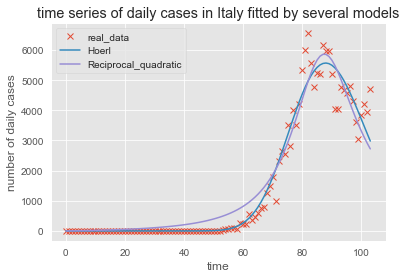

In [42]:
plt.style.use('ggplot') 
plot0=plt.plot(italy_cases['time'],italy_cases['cases'],'x',label="real_data")
plot1=plt.plot(x,Hoerl(x,*p_est1), "-",label="Hoerl")
plot2=plt.plot(x,Reciprocal_quadratic(x,*p_est2), "-",label="Reciprocal_quadratic")
plt.title('time series of daily cases in Italy fitted by several models')
plt.legend(loc=0)  
plt.xlabel("time");plt.ylabel("number of daily cases") 
plt.savefig('../results/ts_Italy2.jpg')

The polt shown here doesn't obviously fits to the data

**'Conclusion'**: The combination of Procrustes and MDS showed that besides the number of infections, the dynamic characteristics play an important role that is not evident in standard representations.